In [1]:
# IMPORTATION.
# THE DATA TO BE USED WILL BE IRIS DATASET FROM SEABORN

%timeit
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

iris_dataset = load_iris()


In [2]:
# CONVERT TO PANDAS DF

print(iris_dataset['DESCR'][: 193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [3]:
# TEST TRAIN SPLIT.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
iris_dataset['data'], iris_dataset['target'], random_state= 0
 )

print("X_train shape: {}".format(X_train.shape))
print("Y_train shape: {}".format(y_train.shape))

# we stil need to rem that the train should be X by 1.
# that is still our target variable.

# thus reshape will do just fine.

y_train = np.reshape(y_train, (112, 1))
print("Y_train shape: {}".format(y_train.shape))
print("Done")

X_train shape: (112, 4)
Y_train shape: (112,)
Y_train shape: (112, 1)
Done


In [4]:
# CONVERT TO PANDAS DATAFRAME.

# creating a dataframe from data in X_train.
# the reason is to get an overview of the data.

iris_df = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

# create a scatter matrix from the dataframe color by y_train
# import mglearn
# grr = iris_dataframe.sca
# (, c=y_train, figsize=(15, 15),
#                        marker='o', hist_kwds={'bins': 20}, s=60, alpha=8)

In [5]:
import seaborn as sns; sns.set()


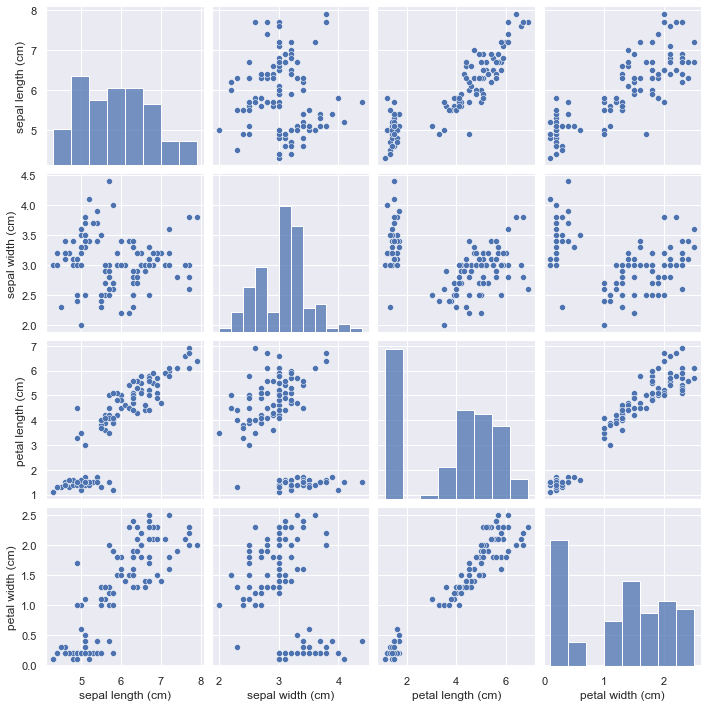

In [6]:
sns.pairplot(iris_df)

<AxesSubplot:>

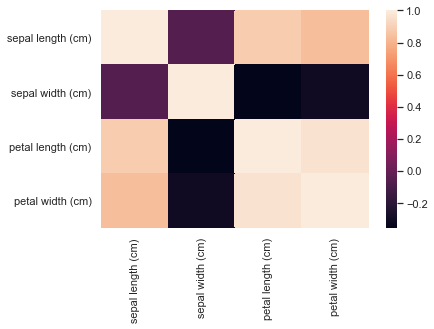

In [7]:
    # AS CAN BE SEEN THERE SEEM TO BE LINEAR RELATION BTWN
    # SEPAL LENGTH -PETAL WIDTH
    # SEPAL LENGTH - PETAL LENGTH
    # SEPAL WIDTH - PETAL LENGTH
    # PETAL WIDTH - PETAL LENGTH
    
    # WILL BE USEFUL TO CHECK THE CORRELATION.
    
    iris_df.head()
    sns.heatmap(iris_df.corr())
#     iris_df.corr()
    
    # " Verdict I need to understand this fxn better to get corr plots."
    # haha nailed it man.
    
#     print(iris_df.describe())
#     iris_df.corr

In [8]:
y_train.shape
y_train = np.reshape(y_train, (112))

In [9]:
# BUILDING YOUR FIRST MODEL: K-NEAREST NEIGHBORS.
# THE BOOK USES KNN.

from sklearn.neighbors import KNeighborsClassifier as KNN

knn = KNN(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [10]:
# NOW TO MAKING PREDICTIONS.
# imagine you are on a safari tour
# you have your gears with you ( ruler or any measuring gadget)
# you stumble upon this beautiful flower
# you take the measurements
#   sepal_length : 5 cm
#   sepal_width  : 2.9 cm
#   petal_length : 1 cm
#   petal_width  : 0.2 cm
#  Now you plug this into your algol.

jungle_species = np.array([[5, 2.9, 1, 0.2]])

# you know the shape but just to be sure.
jungle_species.shape

# Now lets try predicting its species.

prediction = knn.predict(jungle_species)
print("Prediction: {}".format(prediction))

# what is this zero thing??
# aah you think.

print("Predicted Target Name: {}".format(
    iris_dataset['target_names'][prediction]
))

# CAN WE TRUST THIS??

Prediction: [0]
Predicted Target Name: ['setosa']


In [11]:
# EVALUATING OUR MODEL.
# Behold the test dataset.

y_predict = knn.predict(X_test)

# Whats the score.

print("Test Score: {:.2f}".format(knn.score(X_test, y_test)))

# we are correct 97 times out of 100?
# pretty impresive right!!!
print("Thats just it: Want Improvements Follow along.")

Test Score: 0.97
Thats just it: Want Improvements Follow along.


    SUPERVISED MACHINE LEARNING.

In [12]:
# GENERATE THE DATASET.
import mglearn
X, y = mglearn.datasets.make_forge()

# FACING SERIOUS PROBLEMS THE MODULE IS IN THE BASE
# PYTHON LIBRARY BUT ITS NOT WORKING IN THE NOTEBOOKS
# I WONDER WHAT THE PROBLEM MAY BE

ModuleNotFoundError: No module named 'mglearn'

In [13]:
# GOING AHEAD USING SK LEARN BUILT IN DATASETS.

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
# getting what the dataset contains
# NOTE: THE DATASET IS CONTAINED IN A BUNCH FORMAT.
# THEREFORE VALUES ARE ACCESSED USING BUNCH.KEY.

print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [14]:
# AS USUAL WE CONVERT THE DATA TO DATAFRAME.
cancer_df = pd.DataFrame(cancer.data,columns= cancer.feature_names)
cancer_df.head()

# DECIDED TO ADD THE TARGET COLUMN AS A COLUMN

cancer_df['Target'] = cancer.target
cancer_df.head()

# cancer_df['Target'].describe()

# SINCE THE DATASET IS CONTINOUS DATA
# THE PREDICTIONS ARE GONNA BE FOR REAL VALUES.
# JUMPING RIGHT ON DATA ANALYSIS.

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# FIRST LOAD THE DESCRIPTIONS TO GET AN UNDERSTANDING.

print("Data Descriptions: \n {}".format(cancer.DESCR))

# Get summary statics to get a glimpse of whats going on.
cancer_df.describe()

# noticed that the dimension of this data is way too big 31 dimensions??
# we can only plot the distributions atleast to get some idea

sns.pairplot(cancer_df, hue='Target')

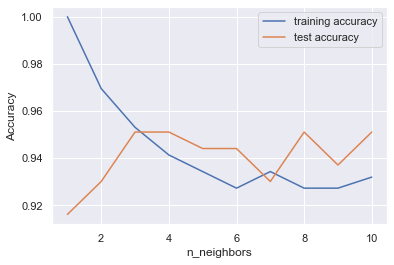

In [15]:
# USING KNN TO CLASSIFY THE BREAST CANCER DATA INTO TWO CLASSES.
# SINCE I HAVE ALREADY IMPORTED THE VARIOUS LIBRARIES
# WE CAN WORK THING USING THE TWO LIBRARIES.

# Split the data first.

x_train, x_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    stratify=cancer.target, 
                                                    random_state = 98)

# WE KNOW THAT WE CAN KNN RELIES ON NEIGHBOURS
# CREATE A FXN TO CHECK THE BEST SCORE.

training_accuracy = []
test_accuracy = []

#try neighbors from 1 - 10

neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # Build the model
    clf = KNN( n_neighbors = n_neighbors)
    clf.fit(x_train, y_train)
    
    # record training set accuracy
    training_accuracy.append(clf.score(x_train, y_train))
    
    # record generalization accuracy
    test_accuracy.append(clf.score(x_test, y_test))


# Now plot the results.

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


In [18]:
x_train.shape
y_train.shape

(426,)

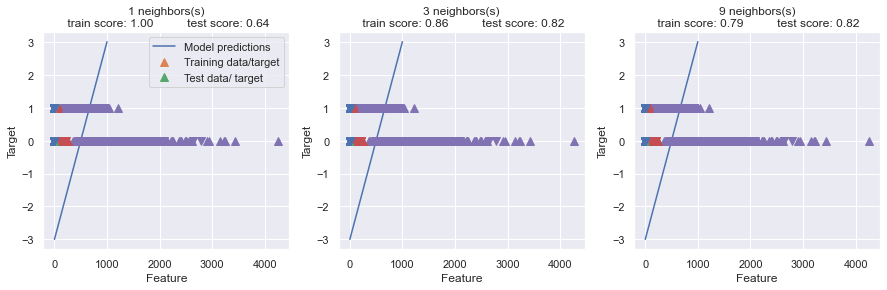

In [25]:
#ANALYZING KNEIGHBORS REGRESSOR

fig, axes = plt.subplots(1,3, figsize=(15, 4))

# Create 1,000 data points, evenly spaced between -3 and 3
from sklearn.neighbors import KNeighborsRegressor as KnR

line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):

    # make predictions using 1, 3, or 9 neighbors

    reg = KnR(n_neighbors= n_neighbors)
    reg.fit(x_train, y_train)
    ax.plot(line)# reg.predict(line)
    
    # NOTE THAT LINE 16 IS FULL OF BUGS.
    
    ax.plot(x_train, y_train, '^', markersize=8) #c=mglearn.cm2(0) )
    ax.plot(x_test, y_test, 'v',markersize=8 )   #c=mglearn.cm2(1) )

    ax.set_title(
        "{} neighbors(s)\n train score: {:.2f} \
         test score: {:.2f}".format(n_neighbors, reg.score(x_train, y_train),
         reg.score(x_test, y_test)))

    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")

axes[0].legend(["Model predictions", "Training data/target",
        "Test data/ target"], loc="best" )


    
# DONT TRUST THE PLOT SEEMS LIKE THE MGLEARN IS GIVING ME PROBLEMS.
# I ADDED THE MODULE AFTER RUNNING THIS NOTEBOOK.